In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import time
import zipfile

In [2]:
import xarray as xr
import rioxarray as rxr
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import geopandas as gpd
import earthpy as et
import regionmask
import contextily as cx

In [3]:
from utils.constants import *
from utils.countries import *
from utils.functions import *

In [4]:
os.chdir(ABSOLUTE_FOLDER_REPOSITORY)

In [5]:
nuts = load_nuts_mask(level=3, subset=EU)

In [6]:
folder_spi = os.path.join(FOLDER_CLIMATE_DATA, 'spi')
filename_spi = 'spa06_NUTS3_MEDIAN_2018.csv'

df_spi = pd.read_csv(os.path.join(folder_spi, filename_spi))

In [7]:
df_spi.head()
df_spi.columns = [x.strip() for x in df_spi.columns.tolist()]

In [8]:
df = nuts.merge(df_spi, on='NUTS_ID')
df = df.dropna()

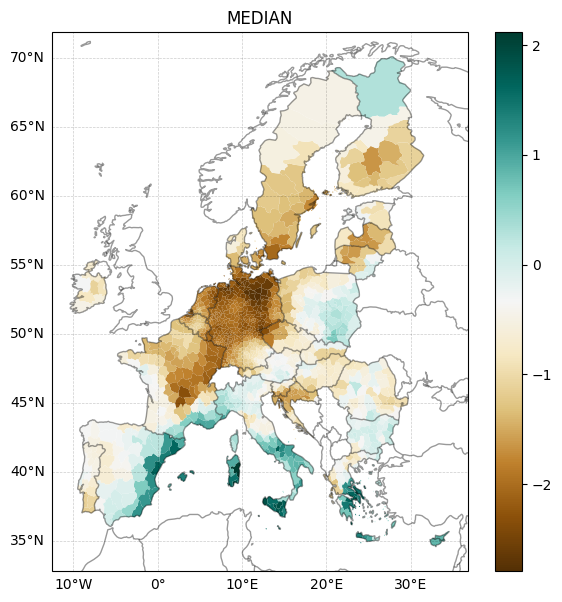

In [9]:
plot_map(
    df[df.TIMESTAMP == df.TIMESTAMP.max()],
    'MEDIAN',
    cmap = 'BrBG'
)